# World happiness survey analysis

Import the modules useful for the analysis.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
%matplotlib inline

Load the data set of interest. For more information, see https://en.wikipedia.org/wiki/World_Happiness_Report. We will use the 2015 data as training set, the 2016 as test set, hence the 2016 data is not loaded yet.

In [2]:
data_2015 = pd.read_csv('Data/world_happiness_2015.csv')

Getting some high-level statistical information on the data set.

In [3]:
data_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
data_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
data_2015.count()

Country                          158
Region                           158
Happiness Rank                   158
Happiness Score                  158
Standard Error                   158
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         158
Freedom                          158
Trust (Government Corruption)    158
Generosity                       158
Dystopia Residual                158
dtype: int64

There doesn't seem to be any missing data, so an imputer is not required.

## Data preparation

Transformer to perform one-hot encoding on the `Region` column of the pandas dataframe.

In [7]:
region_transformer = ColumnTransformer([('one_hot_encoder',
                                         OneHotEncoder(categories='auto'),
                                         ['Region'])])

Transformer to scale numerical values in the relevant columns of the pandas dataframe.

In [8]:
num_attr_names = ['Economy (GDP per Capita)', 'Family',
                  'Health (Life Expectancy)', 'Freedom',
                  'Trust (Government Corruption)', 'Generosity',
                  'Dystopia Residual']

In [9]:
num_attrs_transformer = ColumnTransformer([('minimax', MinMaxScaler(), num_attr_names)])

Combine both transformers into a single pipeline.

In [10]:
preparation_pipeline = FeatureUnion(transformer_list=[
    ('region_attr', region_transformer),
    ('num_attrs', num_attrs_transformer),
])

In [11]:
prepared_data = preparation_pipeline.fit_transform(data_2015)

In [12]:
region_names = list(region_transformer.named_transformers_['one_hot_encoder'].get_feature_names_out())

In [13]:
region_names

['Region_Australia and New Zealand',
 'Region_Central and Eastern Europe',
 'Region_Eastern Asia',
 'Region_Latin America and Caribbean',
 'Region_Middle East and Northern Africa',
 'Region_North America',
 'Region_Southeastern Asia',
 'Region_Southern Asia',
 'Region_Sub-Saharan Africa',
 'Region_Western Europe']

In [14]:
num_attr_names

['Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [15]:
type(prepared_data), prepared_data.shape, prepared_data.dtype

(scipy.sparse._csr.csr_matrix, (158, 17), dtype('float64'))

In [16]:
column_names = region_names + num_attr_names

In [17]:
len(column_names), type(column_names)

(17, list)

In [18]:
prepared_df = pd.DataFrame(prepared_data.toarray(), columns=column_names)

In [19]:
prepared_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Region_Australia and New Zealand        158 non-null    float64
 1   Region_Central and Eastern Europe       158 non-null    float64
 2   Region_Eastern Asia                     158 non-null    float64
 3   Region_Latin America and Caribbean      158 non-null    float64
 4   Region_Middle East and Northern Africa  158 non-null    float64
 5   Region_North America                    158 non-null    float64
 6   Region_Southeastern Asia                158 non-null    float64
 7   Region_Southern Asia                    158 non-null    float64
 8   Region_Sub-Saharan Africa               158 non-null    float64
 9   Region_Western Europe                   158 non-null    float64
 10  Economy (GDP per Capita)                158 non-null    float6

In [20]:
prepared_df.head(3)

,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.826132,0.962403,0.918244,0.993789,0.760595,0.372895,0.668630
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.770412,1.000000,0.924496,0.938841,0.256292,0.548198,0.725030
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.784113,0.970297,0.853099,0.969615,0.876175,0.428947,0.660889


In [21]:
prepared_df.tail(3)

,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
155,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.392329,0.338668,0.704150,0.234184,0.342556,0.592790,0.000000
156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.009051,0.296578,0.218444,0.176937,0.182312,0.247864,0.459573
157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.123449,0.099805,0.277425,0.544294,0.194434,0.209592,0.378389


## Output

Although selecting the output data is trivial, it is more consistent to also use a transformer to do this.

In [22]:
output_transformer = ColumnTransformer([('output', 'passthrough', ['Happiness Score'])])

In [23]:
prepared_output = output_transformer.fit_transform(data_2015)

In [24]:
type(prepared_output), prepared_output.shape, prepared_output.dtype

(numpy.ndarray, (158, 1), dtype('float64'))

## Some trends

Given the limited number of factors, we can visualize potential correllations using a scatter matrix.

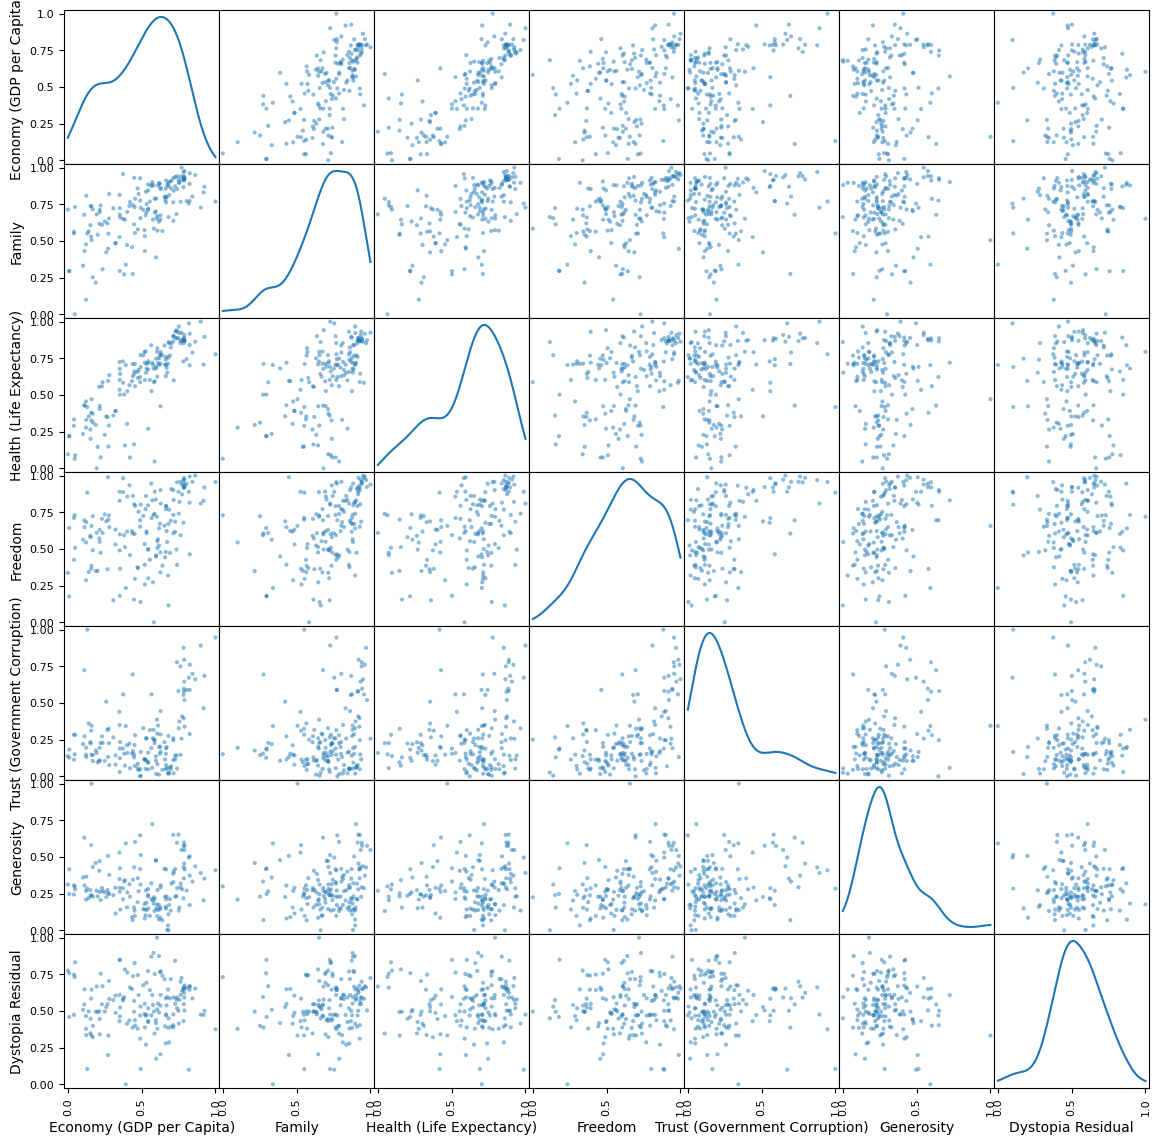

In [25]:
scatter_matrix(prepared_df[num_attr_names], figsize=(14, 14), diagonal='kde');

## Analysis

We will perform a PCA, and want 95 % of the variation explained by the principal components.

In [26]:
pca = PCA(n_components=0.95).fit(prepared_df[num_attr_names])

In [27]:
pd.DataFrame(data=pca.components_, columns=num_attr_names,
             index=(f'factor {i}' for i in range(1, len(pca.components_) + 1)))

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
factor 1,-0.555693,-0.377036,-0.541984,-0.394331,-0.300629,-0.092451,-0.029680
factor 2,-0.335765,-0.127760,-0.335113,0.528774,0.587147,0.360414,-0.066313
factor 3,0.125246,-0.358359,0.229306,-0.326153,0.288593,0.067628,-0.780433
factor 4,-0.140025,0.161327,0.080067,0.351787,-0.652519,0.470704,-0.420545
factor 5,0.088450,0.517259,-0.464458,0.146912,0.040130,-0.530225,-0.452290
factor 6,0.012856,-0.571232,0.177549,0.558288,-0.189897,-0.541394,-0.033922


Somewhat surprisingly, six components are required to explain 95 % of the variation in the data.  Note that this does not take into account the categorical data, i.e., the region.

In [28]:
pca_df = pd.DataFrame(data=pca.transform(prepared_df[num_attr_names]),
                      columns=(f'factor {i}' for i in range(1, len(pca.components_) + 1)))

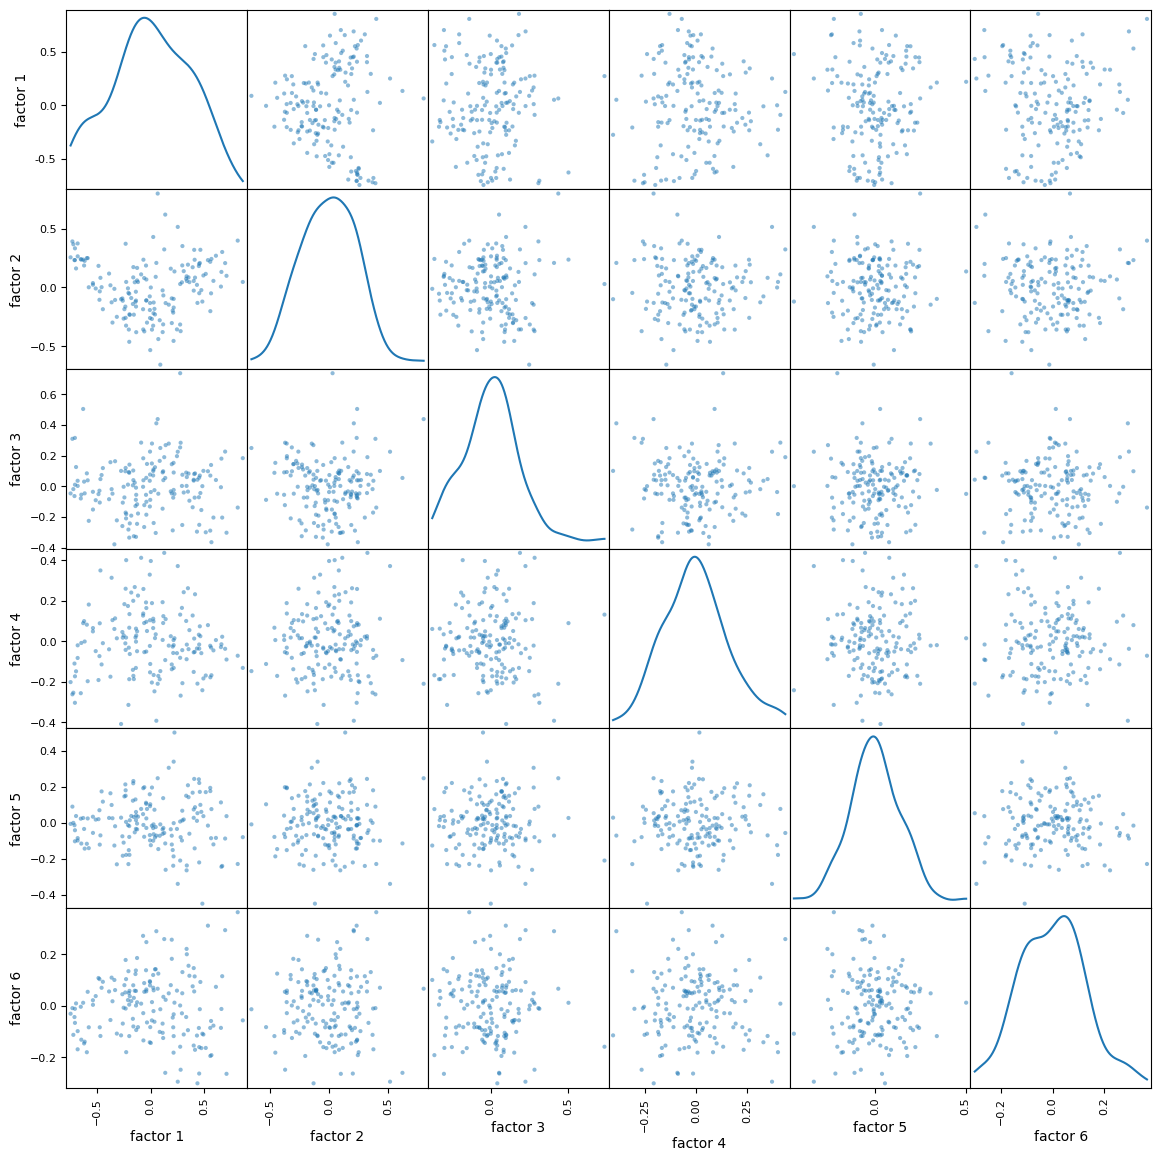

In [29]:
scatter_matrix(pca_df, figsize=(14, 14), diagonal='kde');

There is no obvious correlation visible in the transformed factors, which is indeed expected from the dimensionality reduction.  Given that we can only reduce to six, rather than seven dimensions, we keep working with the original (rescaled) attributes.

## Modelling & training

Try some algorithms, fitting to the 2015 data set happiness score.

In [30]:
X = prepared_data
Y = prepared_output

### Ridge regression

Try the ridge regression learning algorithm first.  This is essentially a linear model with corrections.

In [31]:
rr = Ridge(alpha=0.5, fit_intercept=True)
rr.fit(X, Y);

Check the score on the entire training set.

In [32]:
rr.score(X, Y)

0.9958602932438491

In [33]:
rr.coef_

array([[ 0.10742785, -0.04064779, -0.01935574,  0.04006359, -0.02997466,
         0.12618995, -0.03473565, -0.0706892 , -0.15708775,  0.0788094 ,
         1.51315238,  1.35693884,  0.86647178,  0.6863746 ,  0.55263105,
         0.5971074 ,  2.85348183]])

Compute the error using 10-fold cross validation.

In [34]:
rr_scores = cross_val_score(rr, X, Y, scoring='neg_mean_squared_error', cv=10)

Check the scores.

In [35]:
rmse_rr_scores = np.sqrt(-rr_scores)

In [36]:
print(rmse_rr_scores)

[0.18861629 0.09875305 0.08341985 0.05725227 0.07614624 0.09757979
 0.10752133 0.06875833 0.10122522 0.17693509]


In [37]:
print(np.median(rmse_rr_scores), rmse_rr_scores.std())

0.09816641782536578 0.04143515814893704


Compare the happiness socres predicted by the ridge regression learner with the target values in the training data.  Visualize the predictions of the model versus the actual happiness socres for the training data.

In [38]:
Y_rr = rr.predict(X)

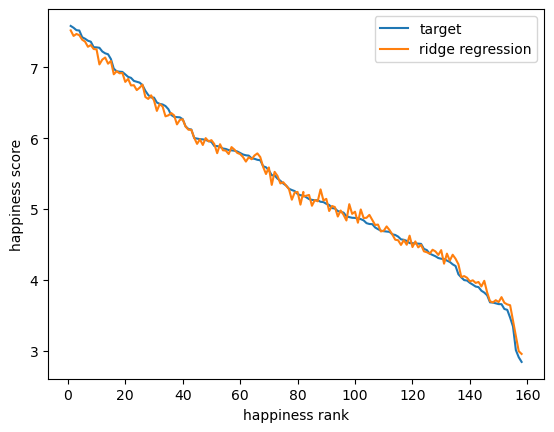

In [39]:
plt.plot(data_2015['Happiness Rank'], Y, label='target')
plt.plot(data_2015['Happiness Rank'], Y_rr, label='ridge regression')
plt.xlabel('happiness rank')
plt.ylabel('happiness score')
plt.legend();

### Fine tuning

In [40]:
grid_params = [
    {'alpha': [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0],
     'fit_intercept': [True, False]},
]

In [41]:
grid_search = GridSearchCV(rr, grid_params, cv=10, scoring='neg_mean_squared_error')

In [42]:
_ = grid_search.fit(X, Y)

In [43]:
grid_search.best_params_

{'alpha': 0.0005, 'fit_intercept': True}

In [44]:
rr_best = Ridge(**grid_search.best_params_).fit(X, Y)

In [45]:
rr_best.score(X, Y)

0.9999997996764571

In [46]:
rr_scores = cross_val_score(rr_best, X, Y, scoring='neg_mean_squared_error', cv=10)

Check the scores.

In [47]:
rmse_rr_scores = np.sqrt(-rr_scores)

In [48]:
print(rmse_rr_scores)

[0.00046192 0.00029904 0.0003574  0.00041336 0.0003277  0.00036926
 0.00051718 0.00045731 0.0006464  0.00090437]


In [49]:
print(np.median(rmse_rr_scores), rmse_rr_scores.std())

0.0004353328497511621 0.00017247156378230903


In [50]:
Y_rr = rr_best.predict(X)

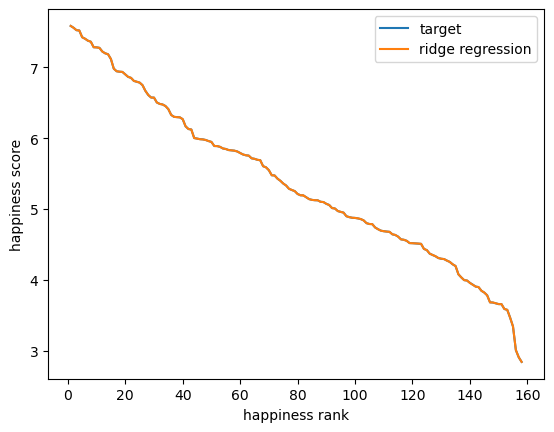

In [51]:
plt.plot(data_2015['Happiness Rank'], Y, label='target')
plt.plot(data_2015['Happiness Rank'], Y_rr, label='ridge regression')
plt.xlabel('happiness rank')
plt.ylabel('happiness score')
plt.legend();

### Random forest

As an alternative, try random forest regression.

In [52]:
rf = RandomForestRegressor(n_estimators=100)

In [53]:
rf.fit(X, Y.ravel());

In [54]:
Y_rf = rf.predict(X)

The score is significantly lower.

In [55]:
rf.score(X, Y)

0.9883369055820782

Visualizing the predictions by the random forrest model versus the actual training data shows fairly large deviations.

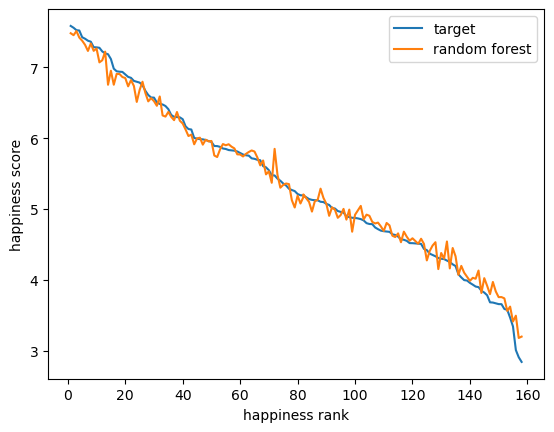

In [56]:
plt.plot(data_2015['Happiness Rank'], Y, label='target')
plt.plot(data_2015['Happiness Rank'], Y_rf, label='random forest')
plt.xlabel('happiness rank')
plt.ylabel('happiness score')
plt.legend();

Cross validation confirms that this model is inferior to ridge regression.

In [57]:
rf_scores = cross_val_score(rf, X, Y.ravel(), scoring='neg_mean_squared_error', cv=10)

In [58]:
rmse_rf_scores = np.sqrt(-rf_scores)

In [59]:
print(rmse_rf_scores)

[0.71082811 0.36419715 0.22095748 0.1759934  0.34730509 0.26645161
 0.26359143 0.21969686 0.43112466 0.84676261]


In [60]:
print(rmse_rf_scores.mean(), rmse_rf_scores.std())

0.3846908400490673 0.21215123309860726


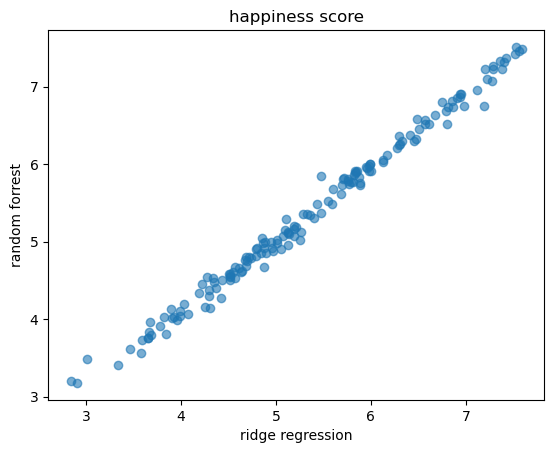

In [61]:
plt.plot(Y_rr, Y_rf, 'o', alpha=0.6)
plt.xlabel('ridge regression')
plt.ylabel('random forrest')
plt.title('happiness score');

### Fine tuning

Perhaps better results can be obtained by a random forest model when its hyperparameters are tuned.

In [62]:
grid_params = [
    {'n_estimators': [100, 200, 300], 'max_features': [8, 10, 12, 14, 16],
     'bootstrap': [False, True]},
]

In [63]:
grid_search = GridSearchCV(rf, grid_params, cv=10,
                           scoring='neg_mean_squared_error')

In [64]:
_ = grid_search.fit(X, Y.ravel())

In [65]:
grid_search.best_params_

{'bootstrap': True, 'max_features': 16, 'n_estimators': 200}

In [66]:
rf_best = RandomForestRegressor(**grid_search.best_params_).fit(X, Y.ravel())

In [67]:
rf_best.score(X, Y)

0.9875956556687949

In [68]:
cv_results = grid_search.cv_results_
for mean_score, params in sorted(zip(cv_results['mean_test_score'], cv_results['params']), key=lambda x: x[0], reverse=True):
    print(np.sqrt(-mean_score), params)

0.4385037131494491 {'bootstrap': True, 'max_features': 16, 'n_estimators': 200}
0.4392670847713859 {'bootstrap': True, 'max_features': 14, 'n_estimators': 200}
0.43944887226000134 {'bootstrap': True, 'max_features': 16, 'n_estimators': 300}
0.44042072673576377 {'bootstrap': True, 'max_features': 14, 'n_estimators': 100}
0.440852636815769 {'bootstrap': True, 'max_features': 16, 'n_estimators': 100}
0.4425498629316198 {'bootstrap': True, 'max_features': 14, 'n_estimators': 300}
0.4443214396945107 {'bootstrap': True, 'max_features': 12, 'n_estimators': 300}
0.44771232091526475 {'bootstrap': True, 'max_features': 12, 'n_estimators': 100}
0.44829298374994314 {'bootstrap': False, 'max_features': 10, 'n_estimators': 200}
0.44931056626420546 {'bootstrap': False, 'max_features': 10, 'n_estimators': 300}
0.4499890622216093 {'bootstrap': False, 'max_features': 8, 'n_estimators': 200}
0.4524386887928389 {'bootstrap': True, 'max_features': 12, 'n_estimators': 200}
0.45249456671022087 {'bootstrap': 

In [69]:
Y_rf = rf_best.predict(X)

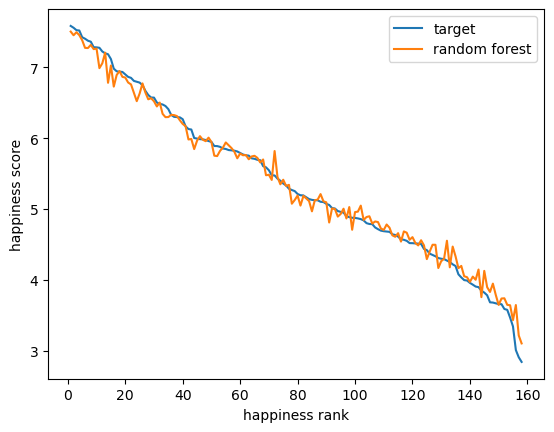

In [70]:
plt.plot(data_2015['Happiness Rank'], Y, label='target')
plt.plot(data_2015['Happiness Rank'], Y_rf, label='random forest')
plt.xlabel('happiness rank')
plt.ylabel('happiness score')
plt.legend();

## Test data

Load the 2016 data set as test data.

In [71]:
data_2016 = pd.read_csv('Data/world_happiness_2016.csv')

Run it through the preprocessing pipeline, note that `transform` should be used, not `fit_transform` since scaling of the numerical attributes should be done using the minima and maxima of the training data, not the test data.

In [72]:
prepared_test_data = preparation_pipeline.transform(data_2016)

In [73]:
X_test = prepared_test_data
Y_test = output_transformer.transform(data_2016)

### Ridge regression

Compute the predictions by the ridge regression model.

In [74]:
Y_test_rr = rr_best.predict(X_test)

In [75]:
rr_best.score(X_test, Y_test)

0.9999994008249758

As expected, the test score is less than the training score, but not by much.

Visualizing the ridge regression predictions illustrates results are quite good.

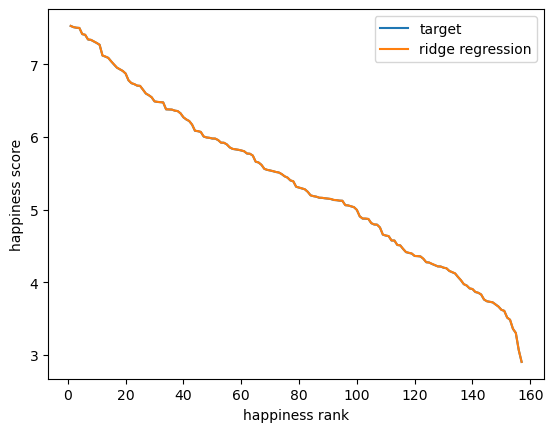

In [76]:
plt.plot(data_2016['Happiness Rank'], Y_test, label='target')
plt.plot(data_2016['Happiness Rank'], Y_test_rr, label='ridge regression')
plt.xlabel('happiness rank')
plt.ylabel('happiness score')
plt.legend();

### Random forest

Compute the random forrest predictions.

In [77]:
Y_test_rf = rf_best.predict(X_test)

The score is significantly lower, and visualization confirms this clearly.

In [78]:
rf_best.score(X_test, Y_test)

0.8835319479443988

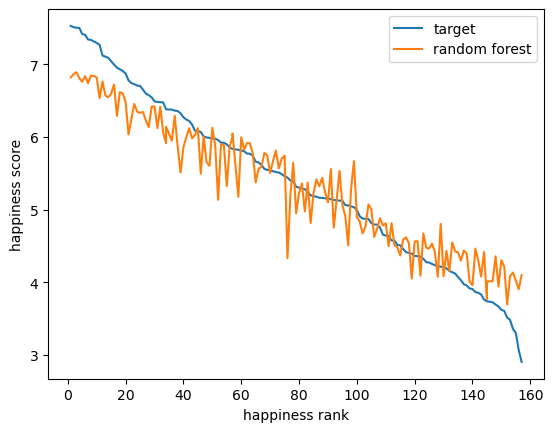

In [79]:
plt.plot(data_2016['Happiness Rank'], Y_test, label='target')
plt.plot(data_2016['Happiness Rank'], Y_test_rf, label='random forest')
plt.xlabel('happiness rank')
plt.ylabel('happiness score')
plt.legend();